In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [4]:
train=pd.read_csv("input/train_diam.csv")
test=pd.read_csv("input/test_diam.csv")

In [5]:
X=train.drop(columns=["price"])
y=train["price"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
models={
    "GB_100":GradientBoostingRegressor(n_estimators=100),
    "GB_200":GradientBoostingRegressor(n_estimators=200),
    "GB_500":GradientBoostingRegressor(n_estimators=500),
    "GB_1000":GradientBoostingRegressor(n_estimators=1000)
}

In [22]:
for name, model in models.items():
    model.fit(X_train,y_train)

In [23]:
for name, model in models.items():
    y_pred=model.predict(X_test)
    print(name)
    print(np.sqrt(mse(y_pred,y_test)))

GB_100
728.2475513632419
GB_200
644.5227432390681
GB_500
592.8167533118872
GB_1000
575.899023465969


In [10]:
reg = GradientBoostingRegressor(random_state=0,n_estimators=2000)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
np.sqrt(mse(y_pred,y_test))

598.575380254627

In [110]:
final=pd.DataFrame({"price":y_pred})
final.index.rename("id", inplace=True)
final

,price
id,
0,4972.606321
1,1825.532798
2,695.031512
3,4960.234562
4,691.361465
...,...
8086,1241.714847
8087,1740.390995
8088,4706.598235


In [ ]:
final.to_csv("output/test1.csv")

**Para intentar mejorar estos resultados y optimizarlos vamos a utilizar selector que nos dice aquellas columnas que son más pertinentes para predecir el precio.**

In [71]:
selector=RFE(reg,step=1)
selector.fit(X_train,y_train)

RFE(estimator=GradientBoostingRegressor(random_state=0))

In [111]:
columns=[]
for i in range(len(X_train.columns)):
    if selector.support_.tolist()[i]==True:
        columns.append(X_train.columns[i])

In [112]:
columns

['carat',
 'x',
 'y',
 'z',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VVS1',
 'clarity_VVS2']

In [113]:
X_train=X_train[columns]
X_test=X_test[columns]

In [114]:
reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [115]:
np.sqrt(mse(y_pred,y_test))

753.3006140461548

In [20]:
reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
np.sqrt(mse(y_pred,y_test))

576.022281017291

In [24]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [25]:
b,m=polyfit(y_test,y_pred,1)

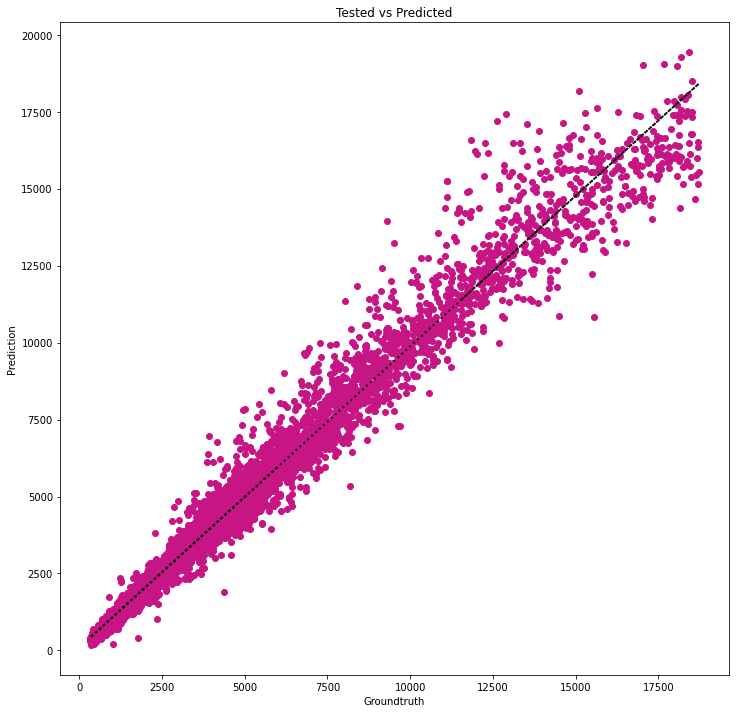

In [33]:
plt.figure(figsize=(12,12))
plt.scatter(x=y_test,y=y_pred, c="mediumvioletred")
plt.plot(y_test,b+m*(y_test),':', c="black", linewidth=2)
plt.title("Tested vs Predicted")
plt.xlabel("Groundtruth")
plt.ylabel("Prediction")
plt.savefig("output/GradientBoosting.jpg")